In [727]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy.linalg import inv
import time

In [728]:
# This function implements the OLS estimator which takes in 1D features, x, expected values y as inputs, and returns two parameters
def ols_estimator_1d(x, y):
    
    m = x.shape[0] # Number of training examples
    
    # Dependent variable (1D) - X matrix
    X = np.array([np.ones(m), x]) 
    X = X.T # Transpose matrix to hold a shape of m x 2 to facilitate matrix multiplication of its transpose with vector y of shape m x 1 


    # Independent variable - y vector
    Y = y[..., None]

    # Implementing OLS Estimator
    # 1D OLS parameters - [\beta_{0}, \beta_{1}], y-intercept and gradient respectively
    betas = np.linalg.inv(X.T @ X) @ X.T @ Y 

    betas = betas.flatten()
    
    return betas

def regression_formula(x, beta1, beta2):
    return beta1 + beta2 * x
    

In [729]:
random.seed(10)
np.random.seed(10)


a = 2
b = -3

# Creates 100 datasets, with 10 data points each
# m = 100 # Number of datasets
n = 50 # training examples 

mean = 0
var = 0.1 

def generate_one_dataset(n, mean, var):
    # Create x and y data
    x = np.array([random.uniform(-1, 1) for i in range(n)])
    error = np.random.normal(loc=mean, scale= math.sqrt(var), size=(n,))
    y = np.array(list(map(lambda x_1, e: a*x_1 + b + e, x, error)))
    return [x, y]

def generate_m_datasets(m, n, mean, var):
    return [generate_one_dataset(n, mean, var) for i in range(m)]


In [730]:
x, y = generate_one_dataset(n, mean, var)
print(x.shape)
print(y.shape)

(50,)
(50,)


In [731]:
beta1, beta2 = ols_estimator_1d(x, y)
print(beta1, beta2)

-2.967683449484289 2.010214024527361


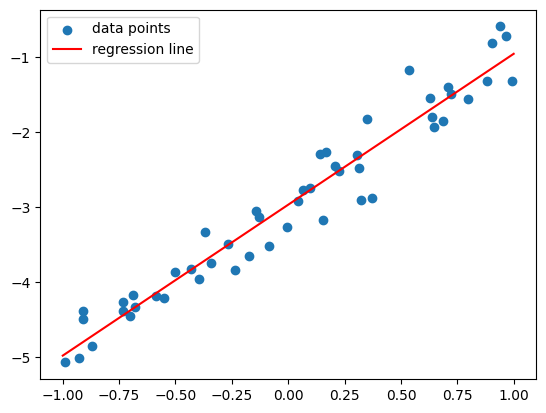

In [732]:
# Scatter plot (data points)
plt.scatter(x,y)

# Plot regression line
x_t = np.linspace(-1,1, num=5)
plt.plot(x_t, regression_formula(x_t, beta1, beta2), c='red')

plt.legend(["data points", "regression line"])

plt.show()

# Q1: Synthetic Teaching

In [733]:
random.seed(8)

# Use the predicted parameter and hypothesis to engineer two features
def create_n_teaching_dp(n, beta1, beta2):
   
    x_ts = np.array([random.uniform(-1, 1) for i in range(n)])
    y_ts = np.array(list(map(lambda x: beta1 + beta2 * x, x_ts)))
    return np.array(list(zip(x_ts,y_ts)))

# Create teaching set n = 2
teaching_set1 = create_n_teaching_dp(2, beta1, beta2)
df = pd.DataFrame(teaching_set1, columns=['x', 'y'])
df

,x,y
0,-0.546588,-4.066443
1,0.924590,-1.109060


### Solve simultanous equations 
$$\hat{{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{y} $$
$$\hat{{\beta}}((\mathbf{X}^{\top} \mathbf{X})^{-1}(\mathbf{X}^{\top}))^{-1}= \mathbf{y} $$

$$ Y = X \hat{\beta} + \hat{U} $$

In [734]:
random.seed(8)

def create_3_teaching_dp_allowing_errors(beta1, beta2): 
    ts = create_n_teaching_dp(3, beta1, beta2)
    print(ts)
    
    # Introduce noise to a data point
    noise = random.uniform(-1, 1)
    ts[1][1] += noise
    
    print(ts)
    x, y = ts.T
    
    X = np.array([np.ones(3), x]) 
    X = X.T # Transpose matrix to hold a shape of m x 2 to facilitate matrix multiplication of its transpose with vector y of shape m x 1 
    
    print(X.shape)


    # Independent variable - y vector
    Y = y[..., None]
    print(Y.shape)

    # Implementing OLS Estimator
    # 1D OLS parameters - [\beta_{0}, \beta_{1}], y-intercept and gradient respectively
    temp = np.linalg.inv(X.T @ X) @ X.T 
    
    print(temp.shape)
    print(temp)
    print(temp[0][:2])
    print(Y)
    print(Y.flatten()[:2])
    
    result = beta1 - np.dot(temp[0][:2], Y.flatten()[:2])/ temp[0][-1]
    print(result)
    
    ts[-1][1] = result

    return ts 
    

# Create teaching set n = 3
teaching_set2 = create_3_teaching_dp_allowing_errors(beta1, beta2)
df = pd.DataFrame(teaching_set2, columns=['x', 'y'])
df

[[-0.54658828 -4.06644288]
 [ 0.92459007 -1.10905952]
 [-0.7473382  -4.46999319]]
[[-0.54658828 -4.06644288]
 [ 0.92459007 -0.69942567]
 [-0.7473382  -4.46999319]]
(3, 2)
(3, 1)
(2, 3)
[[ 0.30205237  0.41072409  0.28722355]
 [-0.25408516  0.62862001 -0.37453486]]
[0.30205237 0.41072409]
[[-4.06644288]
 [-0.69942567]
 [-4.46999319]]
[-4.06644288 -0.69942567]
2.3088674654418284


,x,y
0,-0.546588,-4.066443
1,0.924590,-0.699426
2,-0.747338,2.308867


In [735]:
# Check for successful teaching for both synthetic datasets: Compare "a vs \hat{a}", "b vs \hat{b}"
x_ts1, y_ts1 = teaching_set1.T

# Compare learned parameters from teaching set 1 to predicted parameters
beta1_ts1, beta2_ts1 = ols_estimator_1d(x_ts1, y_ts1)

df1 = pd.DataFrame([[beta1, beta2], [beta1_ts1, beta2_ts1]], columns=['$\hat{a}$', '$\hat{b}$'], index=['predicted', 'learned from teaching set'])
display(df1)

x_ts2, y_ts2 = teaching_set2.T
# Compare learned parameters from teaching set 2 to predicted parameters
beta1_ts2, beta2_ts2 = ols_estimator_1d(x_ts2, y_ts2)

df2 = pd.DataFrame([[beta1, beta2], [beta1_ts2, beta2_ts2]], columns=['$\hat{a}$', '$\hat{b}$'], index=['predicted', 'learned from teaching set'])
display(df2)

,$\hat{a}$,$\hat{b}$
predicted,-2.967683,2.010214
learned from teaching set,-2.967683,2.010214


,$\hat{a}$,$\hat{b}$
predicted,-2.967683,2.010214
learned from teaching set,-0.852389,-0.271202


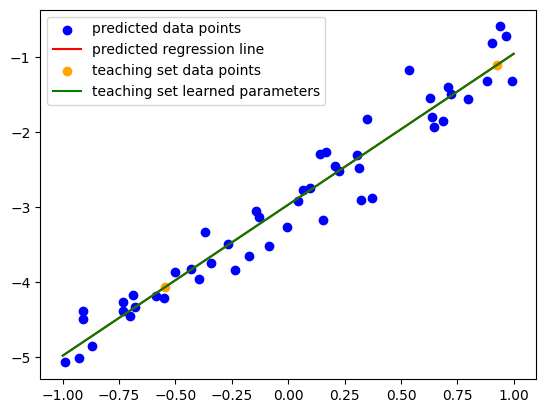

In [736]:
# Overlay the synthetic plot vs predicted plot, and plot the synthetic dataset from teaching set 1

x_t = np.linspace(-1,1, num=5)

# Original data points 
plt.scatter(x, y, c='blue')
plt.plot(x_t, regression_formula(x_t, beta1, beta2), c='red')

# Synthetic teaching set data points
plt.scatter(x_ts1, y_ts1, c='orange')
plt.plot(x_t, regression_formula(x_t, beta1_ts1, beta2_ts1), c='green')

plt.legend(["predicted data points", "predicted regression line", "teaching set data points", "teaching set learned parameters"])

plt.show()


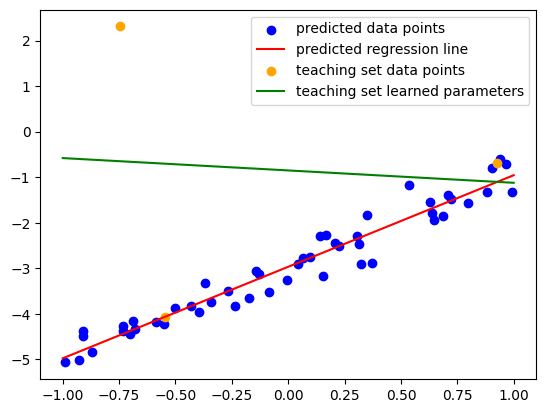

In [737]:
# Overlay the synthetic plot vs predicted plot, and plot the synthetic dataset from teaching set 2

x_t = np.linspace(-1,1, num=5)

# Original data points 
plt.scatter(x, y, c='blue')
plt.plot(x_t, regression_formula(x_t, beta1, beta2), c='red')

# Synthetic teaching set data points
plt.scatter(x_ts2, y_ts2, c='orange')
plt.plot(x_t, regression_formula(x_t, beta1_ts2, beta2_ts2), c='green')

plt.legend(["predicted data points", "predicted regression line", "teaching set data points", "teaching set learned parameters"])

plt.show()

# Q2: Pool-based Teacher

In [738]:
# Read pool of data points from hw3pool.txt
df = pd.read_csv("hw3pool.txt", sep=" ", header=None, names=['x', 'y'])
df.info()
display(df.head())

pool = df.to_numpy()

closeness = lambda a, b, p_a, p_b: (p_a - a)**2 + (p_b - b)**2

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30 entries, nan to nan
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


,x,y
NaN,2.374862,1.080289
NaN,2.946939,1.898605
NaN,1.650485,1.864033
NaN,3.270571,2.691074
NaN,1.168345,-3.032215


In [739]:
# On all 30 entries
x_all, y_all = pool.T
o_beta1, o_beta2 = ols_estimator_1d(x_all, y_all)

print(f'original beta 1: {o_beta1}, original beta 2: {o_beta2}')

original beta 1: -2.370239547206875, original beta 2: 1.637053151711282


Time elapsed: 0.010195016860961914
parameters: [-2.26777778  1.65455661]
closeness: 0.010804784411978798


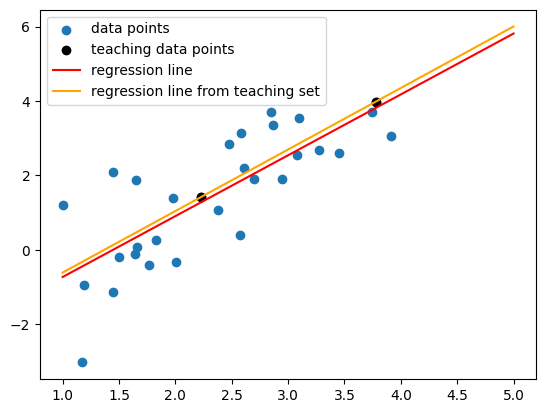

In [740]:
def find_2_pairs(pool, beta1, beta2):
    minimum = math.inf
    start = time.time()
    for i in range(len(pool)):
        for j in range(i+1, len(pool)):
            x1, y1 = pool[i]
            x2, y2 = pool[j]
            X = np.array([x1, x2])
            Y = np.array([y1, y2])
            p_betas= ols_estimator_1d(X, Y)
            c = closeness(beta1, beta2, p_betas[0], p_betas[1])
            if(c <= minimum):
                minimum = c
                result = p_betas 
                chosen_pair = np.array([X,Y])
    end = time.time()
    print(f'Time elapsed: {end - start}')
    return result, chosen_pair
                
result , chosen_pair = find_2_pairs(pool, o_beta1, o_beta2)         
            
print(f'parameters: {result}')
print(f'closeness: {closeness(result[0], result[1], o_beta1, o_beta2)}')

# Scatter plot (data points)
plt.scatter(x_all,y_all)
plt.scatter(chosen_pair[0], chosen_pair[1], c='black')

# Plot regression line
x_t = np.linspace(1,5, num=5)
plt.plot(x_t, regression_formula(x_t, o_beta1, o_beta2), c='red')
plt.plot(x_t, regression_formula(x_t, result[0], result[1]), c='orange')

plt.legend(["data points", "teaching data points", "regression line", "regression line from teaching set"])

plt.show()

Time elapsed: 0.12989306449890137
parameters: [-2.37002656  1.65170213]
closeness: 0.00021463796629338867


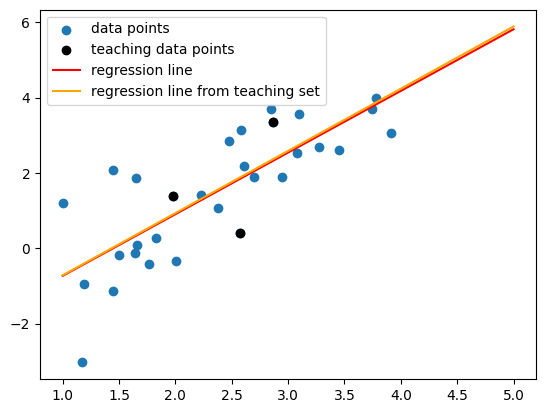

In [741]:
def find_3_pairs(pool, beta1, beta2):
    minimum = math.inf
    start = time.time()
    for i in range(len(pool)):
        for j in range(i+1, len(pool)):
            for k in range(len(pool)):
                x1, y1 = pool[i]
                x2, y2 = pool[j]
                if(k == j or k == i):
                    continue 
                x3, y3 = pool[k]
                X = np.array([x1, x2, x3])
                Y = np.array([y1, y2, y3])
                p_betas= ols_estimator_1d(X, Y)
                c = closeness(beta1, beta2, p_betas[0], p_betas[1])
                if(c <= minimum):
                    minimum = c
                    result = p_betas 
                    chosen_triplet = np.array([X,Y])
    
    end = time.time()
    print(f'Time elapsed: {end - start}')
    return result, chosen_triplet 

result, chosen_triplet = find_3_pairs(pool, o_beta1, o_beta2)
print(f'parameters: {result}')
print(f'closeness: {closeness(result[0], result[1], o_beta1, o_beta2)}')

# Scatter plot (data points)
plt.scatter(x_all,y_all)
plt.scatter(chosen_triplet[0], chosen_triplet[1], c='black')

# Plot regression line
x_t = np.linspace(1,5, num=5)
plt.plot(x_t, regression_formula(x_t, o_beta1, o_beta2), c='red')
plt.plot(x_t, regression_formula(x_t, result[0], result[1]), c='orange')

plt.legend(["data points", "teaching data points", "regression line", "regression line from teaching set"])

plt.show()

In [742]:
# Why is exact teaching infeasible in pool-based teaching?